<a href="https://colab.research.google.com/github/rishikeshpandey13/Adam_optimization/blob/main/Single_cell_Perturbations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
adata=pd.read_csv("/content/drive/MyDrive/adata_obs_meta.csv")

In [ ]:
multiome=pd.read_csv("/content/drive/MyDrive/multiome_obs_meta.csv")

In [ ]:
adata.head(5)

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
multiome.head()

,obs_id,cell_type,donor_id
0,000225c1151ab841,B cells,donor_0
1,0003c40a54367871,T cells CD4+,donor_2
2,0004bf574b822c3c,T cells CD4+,donor_2
3,000d59b5478f28e2,B cells,donor_0
4,0011b7473923d7b5,NK cells,donor_2


In [ ]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240090 entries, 0 to 240089
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   obs_id        240090 non-null  object 
 1   library_id    240090 non-null  object 
 2   plate_name    240090 non-null  object 
 3   well          240090 non-null  object 
 4   row           240090 non-null  object 
 5   col           240090 non-null  int64  
 6   cell_id       240090 non-null  object 
 7   donor_id      240090 non-null  object 
 8   cell_type     240090 non-null  object 
 9   sm_lincs_id   240090 non-null  object 
 10  sm_name       240090 non-null  object 
 11  SMILES        240090 non-null  object 
 12  dose_uM       240090 non-null  float64
 13  timepoint_hr  240090 non-null  int64  
 14  control       240090 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 25.9+ MB


In [ ]:
adata.describe()

,col,dose_uM,timepoint_hr
count,240090.00000,240090.000000,240090.0
mean,6.05665,2.462781,24.0
std,3.55246,4.276144,0.0
min,1.00000,0.100000,24.0
25%,3.00000,1.000000,24.0
50%,6.00000,1.000000,24.0
75%,9.00000,1.000000,24.0
max,12.00000,14.100000,24.0


In [ ]:
multiome.describe()

,obs_id,cell_type,donor_id
count,25551,25551,25551
unique,25551,6,3
top,000225c1151ab841,T cells CD4+,donor_2
freq,1,9371,9588


In [ ]:
adata=adata.dropna()

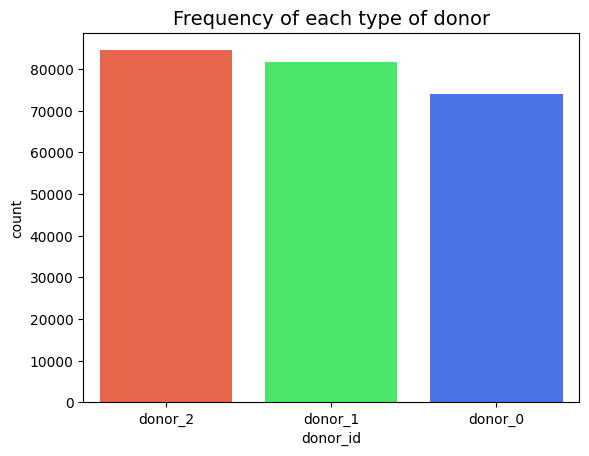

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FF5733", "#33FF57", "#3366FF"]
sns.countplot(data=adata, x='donor_id', palette=colors)
plt.title('Frequency of each type of donor', fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


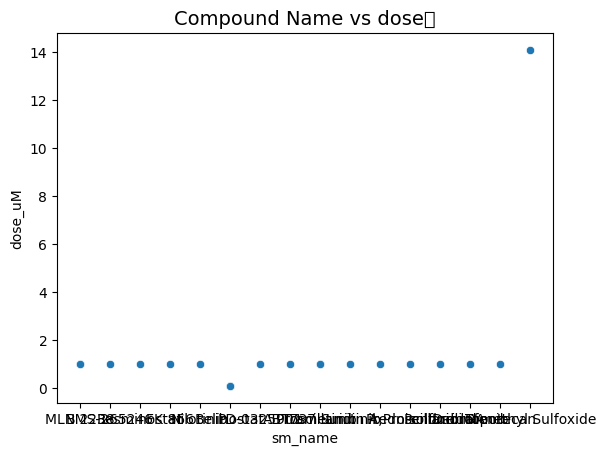

In [ ]:

sns.scatterplot(data=adata.head(20), x='sm_name', y='dose_uM')
plt.title('Compound Name vs dose	', fontsize=14)
plt.show()

In [ ]:
grouped = adata.groupby('sm_name')['dose_uM'].sum().reset_index()



In [ ]:
grouped

,sm_name,dose_uM
0,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,1313.0
1,ABT-199 (GDC-0199),926.0
2,ABT737,655.0
3,AMD-070 (hydrochloride),1022.0
4,AT 7867,1230.0
...,...,...
142,Vandetanib,1063.0
143,Vanoxerine,994.0
144,Vardenafil,1041.0
145,Vorinostat,1183.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


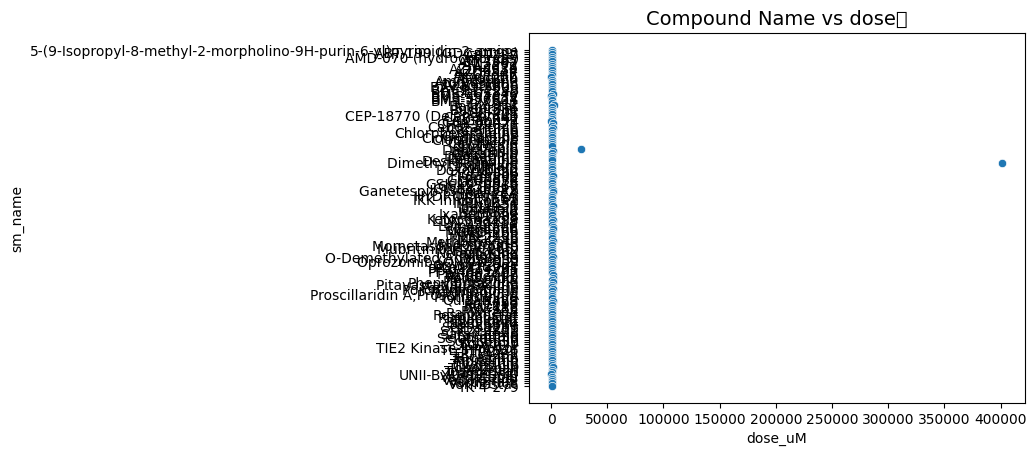

In [ ]:

sns.scatterplot(data=grouped, y='sm_name', x='dose_uM')
plt.title('Compound Name vs dose	', fontsize=14)
plt.show()

In [ ]:
grouped.max()

sm_name    YK 4-279
dose_uM    401314.2
dtype: object

In [ ]:
grouped.mean()

<ipython-input-34-eca914d15133>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped.mean()


dose_uM    4022.37483
dtype: float64

In [ ]:
grouped[grouped['dose_uM'] > 911]


,sm_name,dose_uM
0,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...,1313.0
1,ABT-199 (GDC-0199),926.0
3,AMD-070 (hydrochloride),1022.0
4,AT 7867,1230.0
5,AT13387,1020.0
...,...,...
142,Vandetanib,1063.0
143,Vanoxerine,994.0
144,Vardenafil,1041.0
145,Vorinostat,1183.0


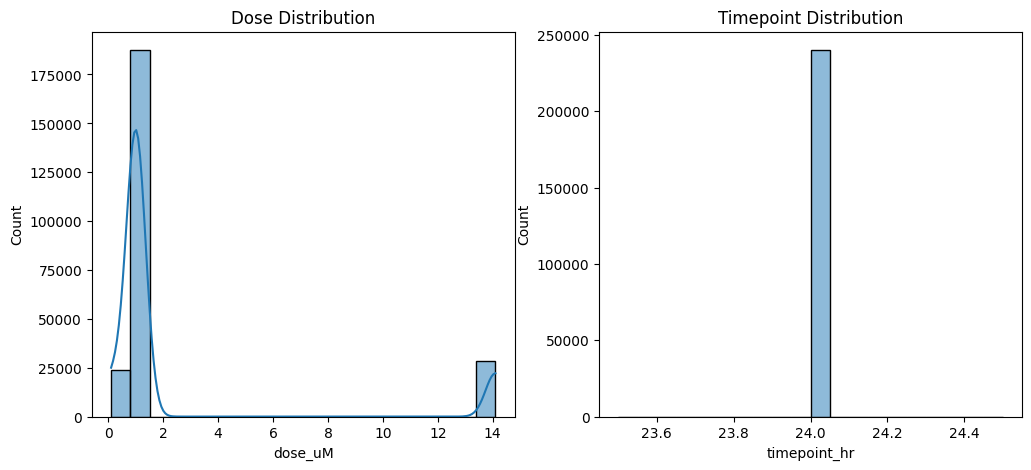

In [ ]:


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(adata['dose_uM'], bins=20, kde=True)
plt.title('Dose Distribution')

plt.subplot(1, 2, 2)
sns.histplot(adata['timepoint_hr'], bins=20, kde=True)
plt.title('Timepoint Distribution')

plt.show()


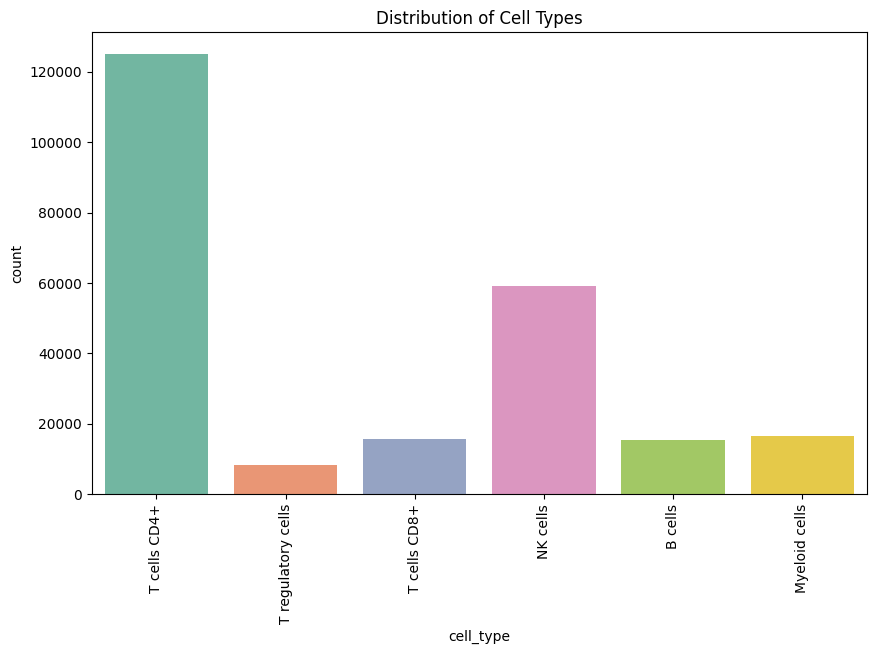

In [ ]:


# Visualize counts of 'cell_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=adata, x='cell_type', palette='Set2')
plt.xticks(rotation=90)
plt.title('Distribution of Cell Types')
plt.show()

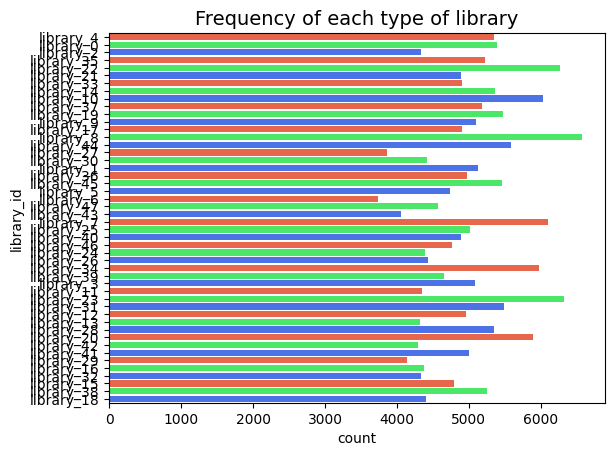

In [ ]:
colors = ["#FF5733", "#33FF57", "#3366FF"]
sns.countplot(data=adata, y='library_id', palette=colors)
plt.title('Frequency of each type of library', fontsize=14)
plt.show()

<ipython-input-39-ee04f496355d>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=library_count, x='Library_ID', y='Count', palette="viridis")


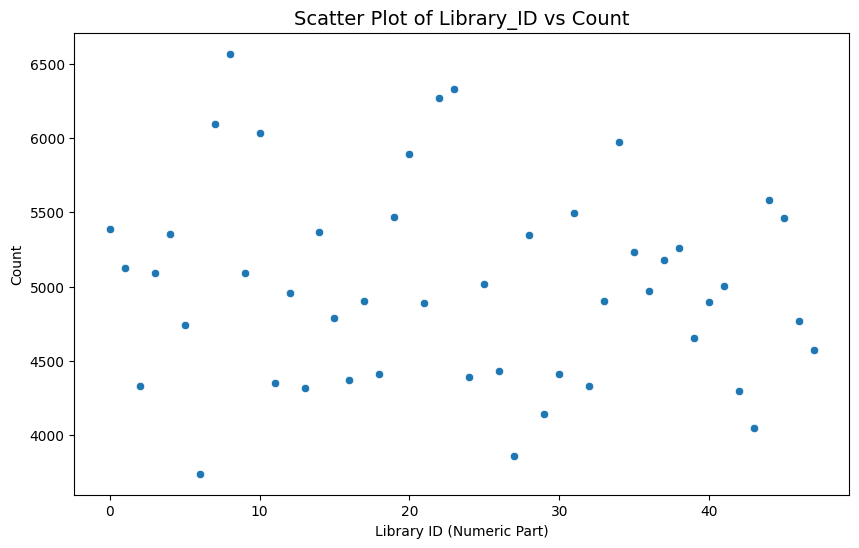

In [ ]:
adata['library_id_numeric'] = adata['library_id'].str.extract(r'(\d+)').astype(int)

# Count the frequency of each library
library_count = adata['library_id_numeric'].value_counts().reset_index()
library_count.columns = ['Library_ID', 'Count']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=library_count, x='Library_ID', y='Count', palette="viridis")
plt.title('Scatter Plot of Library_ID vs Count', fontsize=14)
plt.xlabel('Library ID (Numeric Part)')
plt.ylabel('Count')
plt.show()

<ipython-input-40-f1bd0c0b65a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = adata.corr()


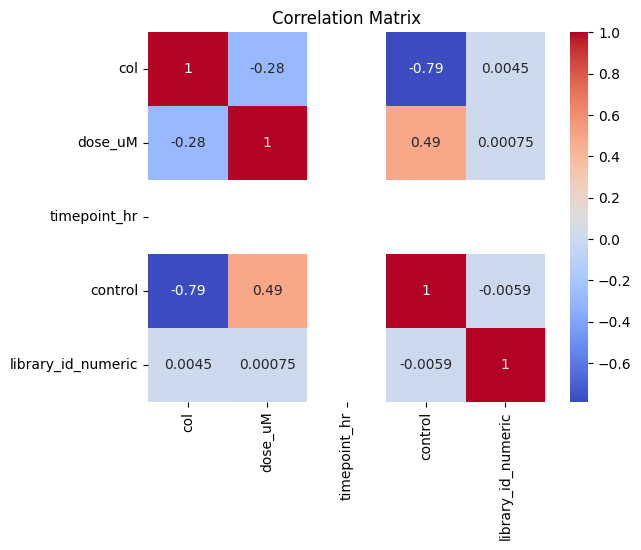

In [ ]:
# Example: Calculate correlation matrix
correlation_matrix = adata.corr()

# Plot correlation matrix as a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


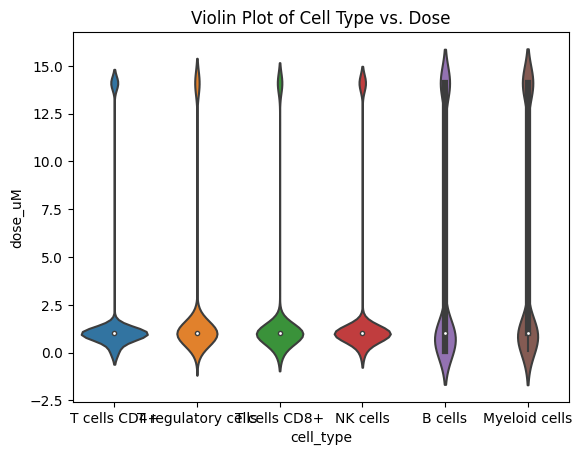

In [ ]:
# Example: Violin plot for cell_type vs. dose_uM
sns.violinplot(x='cell_type', y='dose_uM', data=adata)
plt.title('Violin Plot of Cell Type vs. Dose')
plt.show()


###Parquet File


In [ ]:
pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=e0bcf6064a2fd7e247f137fa197c958511144b322e92e645816b806d0d47bf76
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=31140fef22d128142803fef3ce488891d3653a9c5d17327d9973d4581e73ccd1
  Stored in directory: /root/.cache/pip/wheels/6

In [ ]:
import pandas as pd
import scanpy

de_adata_train = pd.read_parquet("/content/drive/MyDrive/open-problems-single-cell-perturbations/de_train.parquet")
de_adata_train.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [ ]:
de_adata_train.columns

Index(['cell_type', 'sm_name', 'sm_lincs_id', 'SMILES', 'control', 'A1BG',
       'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2MP1',
       ...
       'ZUP1', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=18216)

In [ ]:
summary_stats = de_adata_train.describe()
summary_stats

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.366769,0.250951,0.148259,0.155733,0.684275,0.946273,0.000582,0.348203,0.009424,0.062662,...,0.071179,0.159252,0.018584,0.267114,0.497043,0.382672,0.240726,0.161087,-0.160735,-0.071255
std,1.634697,1.188660,2.275410,2.184095,3.189206,3.826391,0.703410,1.259422,0.952243,1.237806,...,1.028842,1.128245,1.333236,1.439952,1.691722,1.430553,0.918039,0.779918,0.932961,0.748377
min,-3.258689,-4.067518,-28.552191,-17.801989,-6.378904,-6.908058,-3.167504,-2.825505,-3.654218,-8.042101,...,-4.309438,-4.276411,-21.273505,-5.520507,-6.780020,-2.617712,-8.310726,-3.456731,-7.189487,-4.819105
25%,-0.215161,-0.267728,-0.230129,-0.229460,-0.190989,-0.123963,-0.261792,-0.197019,-0.356774,-0.214164,...,-0.349490,-0.289498,-0.421265,-0.275030,-0.119912,-0.135779,-0.141982,-0.169364,-0.479099,-0.402733
50%,0.082722,0.102076,0.044717,0.036156,0.116411,0.131515,0.009045,0.144223,-0.028306,0.068134,...,0.010186,0.063539,-0.010158,0.065780,0.148876,0.145279,0.137559,0.062804,-0.083260,-0.058601
75%,0.528015,0.523162,0.405858,0.532216,0.616725,0.580870,0.268029,0.560221,0.253911,0.413308,...,0.330117,0.479763,0.361876,0.482989,0.683587,0.600652,0.510566,0.487592,0.266170,0.252387
max,22.085428,14.421991,27.557166,27.603715,35.278040,34.785942,5.079223,15.589494,10.855080,6.518868,...,10.803264,15.959706,10.649018,17.231287,23.721492,23.089832,10.844942,4.822008,7.826692,3.534737


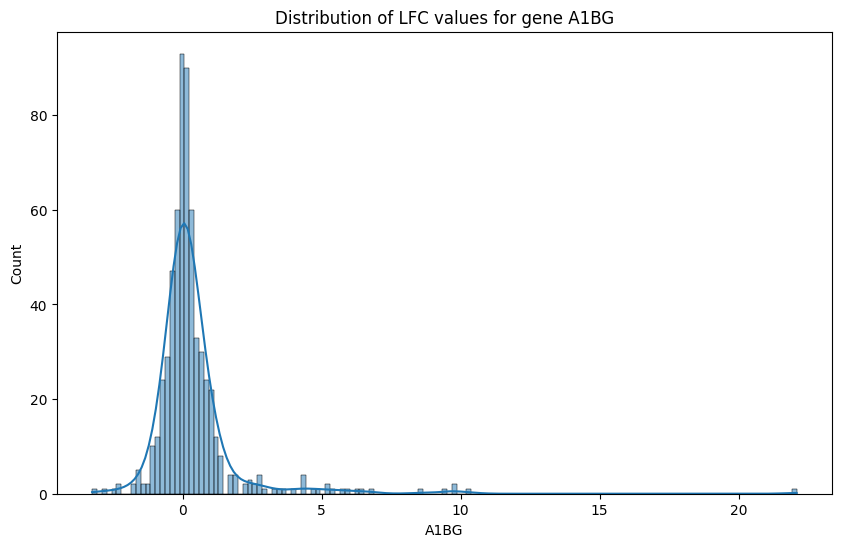

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(de_adata_train['A1BG'], kde=True)
plt.title('Distribution of LFC values for gene A1BG')
plt.show()

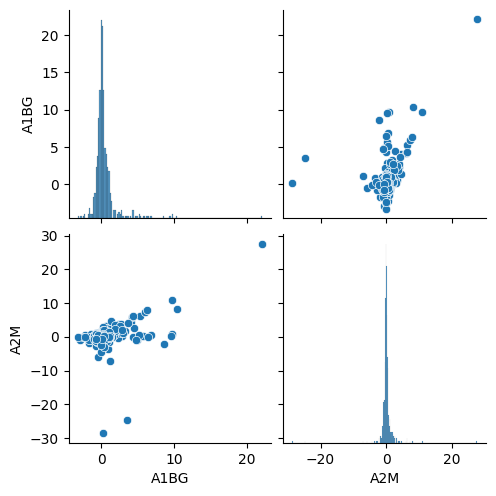

In [ ]:
sns.pairplot(de_adata_train[['A1BG', 'A2M', 'sm_name']])
plt.show()

<ipython-input-10-fa25a02af3e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = de_adata_train[['A1BG', 'A2M', 'SMILES']].corr()


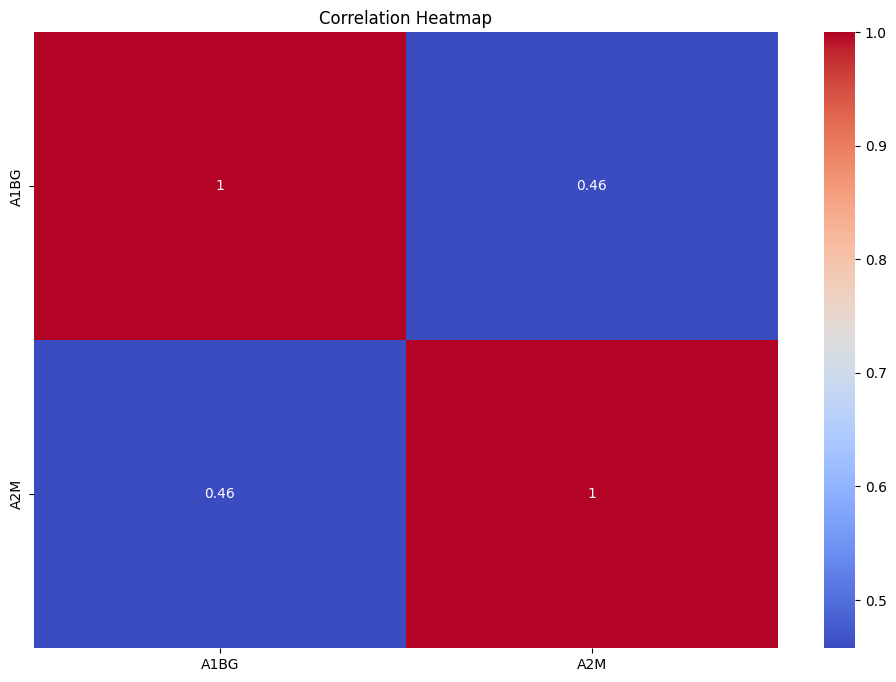

In [ ]:
# Heatmap of correlation between genes
plt.figure(figsize=(12, 8))
corr = de_adata_train[['A1BG', 'A2M', 'SMILES']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

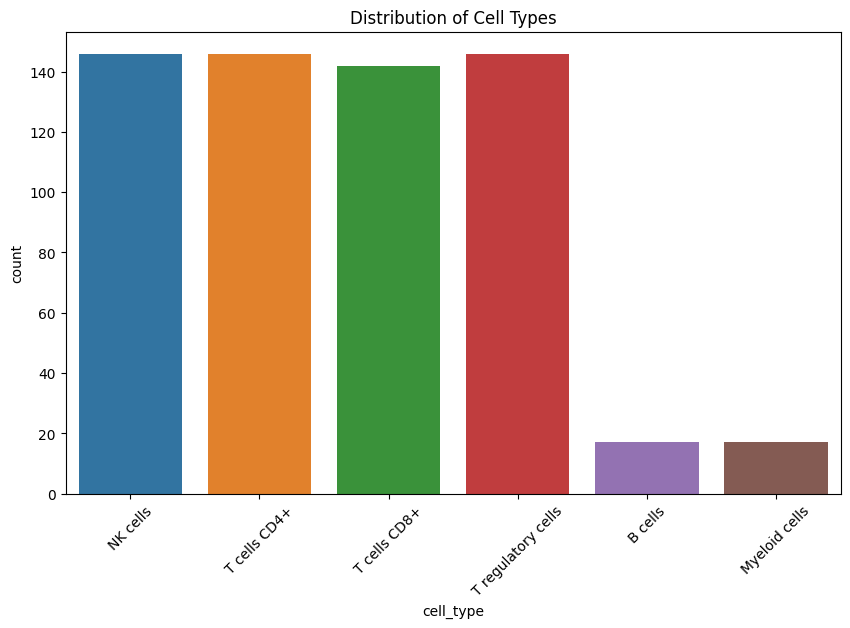

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cell_type', data=de_adata_train)
plt.title('Distribution of Cell Types')
plt.xticks(rotation=45)
plt.show()

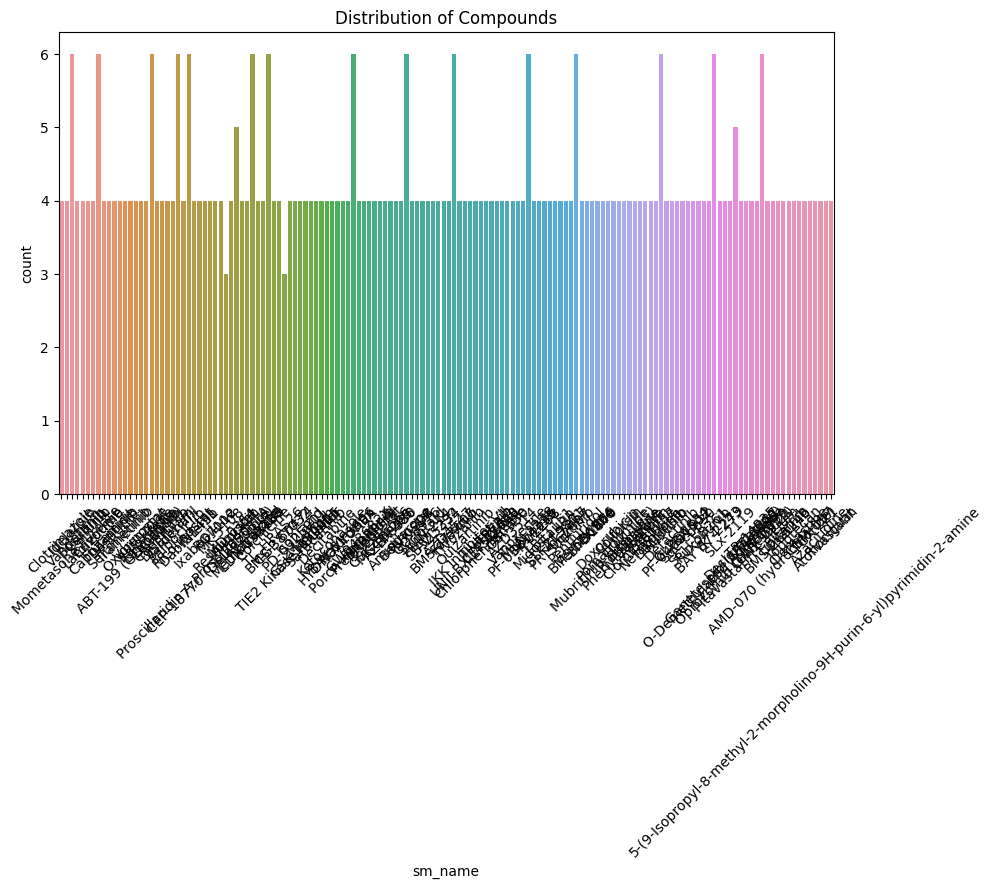

In [ ]:
# Distribution of sm_name (compounds)
plt.figure(figsize=(10, 6))
sns.countplot(x='sm_name', data=de_adata_train)
plt.title('Distribution of Compounds')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
X = de_adata_train.loc[:, de_adata_train.columns.tolist()[5 : de_adata_train.shape[1]]]
X.head()

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,0.104720,-0.077524,-1.625596,-0.144545,0.143555,0.073229,-0.016823,0.101717,-0.005153,1.043629,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,0.915953,-0.884380,0.371834,-0.081677,-0.498266,0.203559,0.604656,0.498592,-0.317184,0.375550,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,-0.387721,-0.305378,0.567777,0.303895,-0.022653,-0.480681,0.467144,-0.293205,-0.005098,0.214918,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,0.232893,0.129029,0.336897,0.486946,0.767661,0.718590,-0.162145,0.157206,-3.654218,-0.212402,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,4.290652,-0.063864,-0.017443,-0.541154,0.570982,2.022829,0.600011,1.231275,0.236739,0.338703,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [ ]:
numeric_data = X.select_dtypes(include=[np.number])
standardized_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

In [ ]:
pca = PCA(n_components=2)
pca.fit(standardized_data)

PCA(n_components=2)

In [ ]:
pca_data = pca.transform(standardized_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-15.694833,-2.484490
1,-22.025407,0.042148
2,-42.387477,-1.308809
3,1.491591,-5.638247
4,18.928080,-1.439114


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



# Split the data into features (X) and target (y)
X = de_adata_train.iloc[:, :5]  # First 5 columns are features
y = de_adata_train.iloc[:, 5:]  # Columns 6 and onwards are target variables

# Perform one-hot encoding on categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Evaluate the model for each gene
from sklearn.metrics import mean_squared_error

for i, gene in enumerate(y.columns):
    y_test_gene = y_test[gene]
    y_pred_gene = y_pred[:, i]
    mse_gene = mean_squared_error(y_test_gene, y_pred_gene)
    print(f"Mean Squared Error for gene {gene}: {mse_gene}")

overall_mse = mean_squared_error(y_test, y_pred)
print(f"Overall Mean Squared Error: {overall_mse}")




Streaming output truncated to the last 5000 lines.
Mean Squared Error for gene REEP1: 3.9052864303743853
Mean Squared Error for gene REEP3: 0.8426847993457407
Mean Squared Error for gene REEP4: 0.7678807769061584
Mean Squared Error for gene REEP5: 3.3258427566130786
Mean Squared Error for gene REEP6: 3.8334845436974176
Mean Squared Error for gene REG4: 9.070534124148008
Mean Squared Error for gene REL: 16.365560306955274
Mean Squared Error for gene RELA: 0.715851521284554
Mean Squared Error for gene RELB: 7.160793457741399
Mean Squared Error for gene RELCH: 0.8017783946245115
Mean Squared Error for gene RELL1: 1.1231872544687167
Mean Squared Error for gene RELL2: 2.215147198026012
Mean Squared Error for gene RELT: 2.581023224990392
Mean Squared Error for gene REM2: 2.412844495503538
Mean Squared Error for gene RENBP: 1.2515653405068996
Mean Squared Error for gene REPIN1: 0.7205056924784843
Mean Squared Error for gene REPS1: 0.7962057114939886
Mean Squared Error for gene REPS2: 3.473347

###TruncatedSVD

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD

# Split the data into features (X) and target (y)
X = de_adata_train.iloc[:, :5]  # First 5 columns are features
y = de_adata_train.iloc[:, 5:]  # Columns 6 and onwards are target variables

# Perform one-hot encoding on categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Apply TruncatedSVD to reduce dimensionality
svd = TruncatedSVD(n_components=2)  # Choose the number of components as per your requirement
X_svd = svd.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values
y_pred = model.predict(X_test)

# Evaluate the model for each gene
from sklearn.metrics import mean_squared_error

for i, gene in enumerate(y.columns):
    y_test_gene = y_test[gene]
    y_pred_gene = y_pred[:, i]
    mse_gene = mean_squared_error(y_test_gene, y_pred_gene)
    print(f"Mean Squared Error for gene {gene}: {mse_gene}")

overall_mse = mean_squared_error(y_test, y_pred)
print(f"Overall Mean Squared Error: {overall_mse}")


Streaming output truncated to the last 5000 lines.
Mean Squared Error for gene REEP1: 2.962773407409953
Mean Squared Error for gene REEP3: 0.7614784600957272
Mean Squared Error for gene REEP4: 1.2616267437814281
Mean Squared Error for gene REEP5: 3.7802412167294333
Mean Squared Error for gene REEP6: 2.667109425753293
Mean Squared Error for gene REG4: 6.7449236601635425
Mean Squared Error for gene REL: 23.491181650970827
Mean Squared Error for gene RELA: 1.017962235845696
Mean Squared Error for gene RELB: 10.463295100054276
Mean Squared Error for gene RELCH: 0.5822744215925069
Mean Squared Error for gene RELL1: 1.2323146989905238
Mean Squared Error for gene RELL2: 5.187780265577401
Mean Squared Error for gene RELT: 1.5511974698647146
Mean Squared Error for gene REM2: 1.724786261832778
Mean Squared Error for gene RENBP: 1.2111109443383896
Mean Squared Error for gene REPIN1: 0.5438580506302054
Mean Squared Error for gene REPS1: 0.6471523016182055
Mean Squared Error for gene REPS2: 3.30046